# **Wallmart Sales Analysis**

- This notebook provides a comprehensive analysis of Walmart sales data to get actionable business insights.
- The analysis includes seasonal sales patterns, store performance variability, the impact of holidays on sales, and the effects of external factors such as temperature, CPI, and unemployment on sales.
- Specific recommendations are provided to optimize sales strategies and drive growth.


## **Import Libraries**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)

import warnings
warnings.filterwarnings('ignore')

## **Basic Understanding of The Data**

In [ ]:
# Import df & show sample

df = pd.read_csv('/content/Walmart_Sales.csv')
df.sample(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
1637,12,29-04-2011,994966.10,0,68.27,4.151,128.999867,13.736
292,3,19-03-2010,375328.59,0,60.42,2.720,214.530122,7.368
2252,16,24-02-2012,495720.30,0,26.21,3.129,196.949901,6.162
540,4,23-03-2012,2091592.54,0,59.07,3.759,130.896645,4.607
1008,8,26-03-2010,772539.12,0,46.51,2.732,214.370357,6.299


## **Data Exploration**

In [ ]:
# Show df Info

list_item = []
for col in df.columns:
    list_item.append([col, df[col].dtype, df[col].isna().sum(), 100*df[col].isna().sum()/len(df[col]), df[col].nunique(), df[col].unique()[:5]])
desc_df = pd.DataFrame(data=list_item, columns='Feature,df Type,Null, Null (%),Unique,Unique Sample'.split(","))
desc_df

,Feature,df Type,Null,Null (%),Unique,Unique Sample
0,Store,int64,0,0.0,45,"[1, 2, 3, 4, 5]"
1,Date,object,0,0.0,143,"[05-02-2010, 12-02-2010, 19-02-2010, 26-02-201..."
2,Weekly_Sales,float64,0,0.0,6435,"[1643690.9, 1641957.44, 1611968.17, 1409727.59..."
3,Holiday_Flag,int64,0,0.0,2,"[0, 1]"
4,Temperature,float64,0,0.0,3528,"[42.31, 38.51, 39.93, 46.63, 46.5]"
5,Fuel_Price,float64,0,0.0,892,"[2.572, 2.548, 2.514, 2.561, 2.625]"
6,CPI,float64,0,0.0,2145,"[211.0963582, 211.2421698, 211.2891429, 211.31..."
7,Unemployment,float64,0,0.0,349,"[8.106, 7.808, 7.787, 7.838, 7.742]"


In [ ]:
# Show df Rows & Features Number
print("Total Rows :", df.shape[0])
print("Total Features :", df.shape[1])

Total Rows : 6435
Total Features : 8


In [ ]:
# Check duplicated value
df.duplicated().sum()

0

In [ ]:
# Statistics about the data set
df.describe().style.background_gradient(cmap='bone_r')

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1046964.877562,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,564366.622054,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,209986.250000,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,553350.105000,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,960746.040000,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1420158.660000,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3818686.450000,1.000000,100.140000,4.468000,227.232807,14.313000


## **Feature Engineering**

In [ ]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Extract features like year, month, day, etc
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])
    df['Year'] = df['Date'].dt.year
    df['Month'] = df['Date'].dt.month
    df['Day'] = df['Date'].dt.day
    df['Weekday'] = df['Date'].dt.weekday
    df['WeekOfYear'] = df['Date'].dt.isocalendar().week


In [ ]:
# One-hot encode categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

## **Seasonal Sales Analysis**

In [ ]:
# Group sales by year and month to analyze seasonality
monthly_sales = df_encoded.groupby(['Year', 'Month'])['Weekly_Sales'].sum().reset_index()

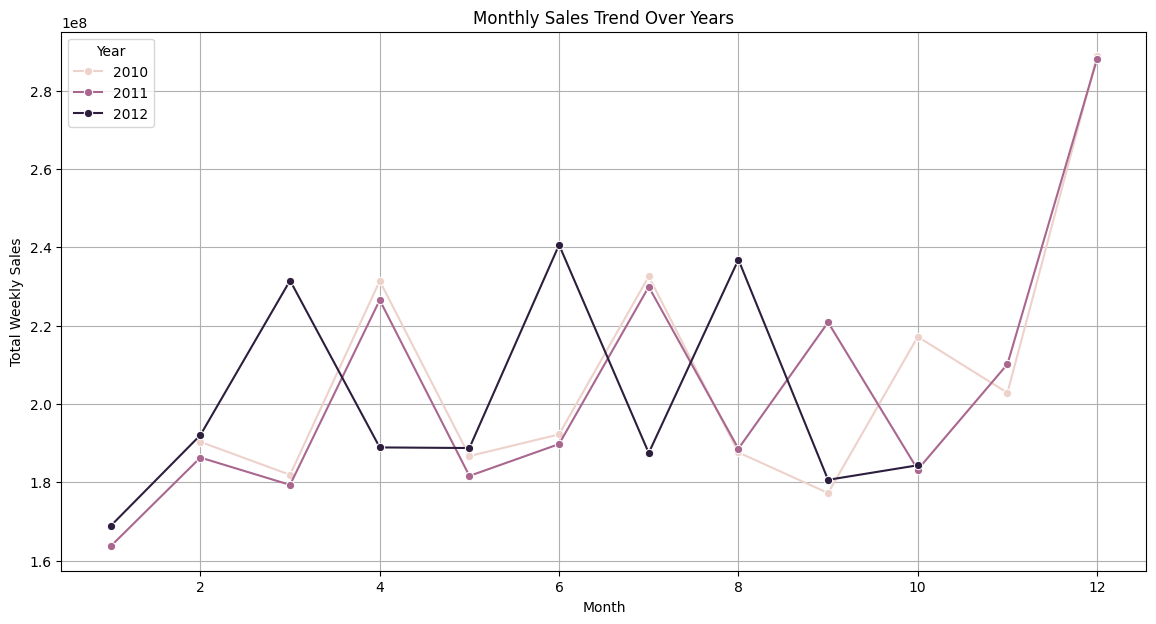

In [ ]:
# Plot: Monthly Sales Trend Over Years
plt.figure(figsize=(14, 7))
sns.lineplot(data=monthly_sales, x='Month', y='Weekly_Sales', hue='Year', marker='o')
plt.title('Monthly Sales Trend Over Years')
plt.xlabel('Month')
plt.ylabel('Total Weekly Sales')
plt.grid(True)
plt.show()

## **Store Performance Analysis**

In [ ]:
# Group sales by store and year to analyze performance over time
store_year_sales = df_encoded.groupby(['Store', 'Year'])['Weekly_Sales'].sum().reset_index()


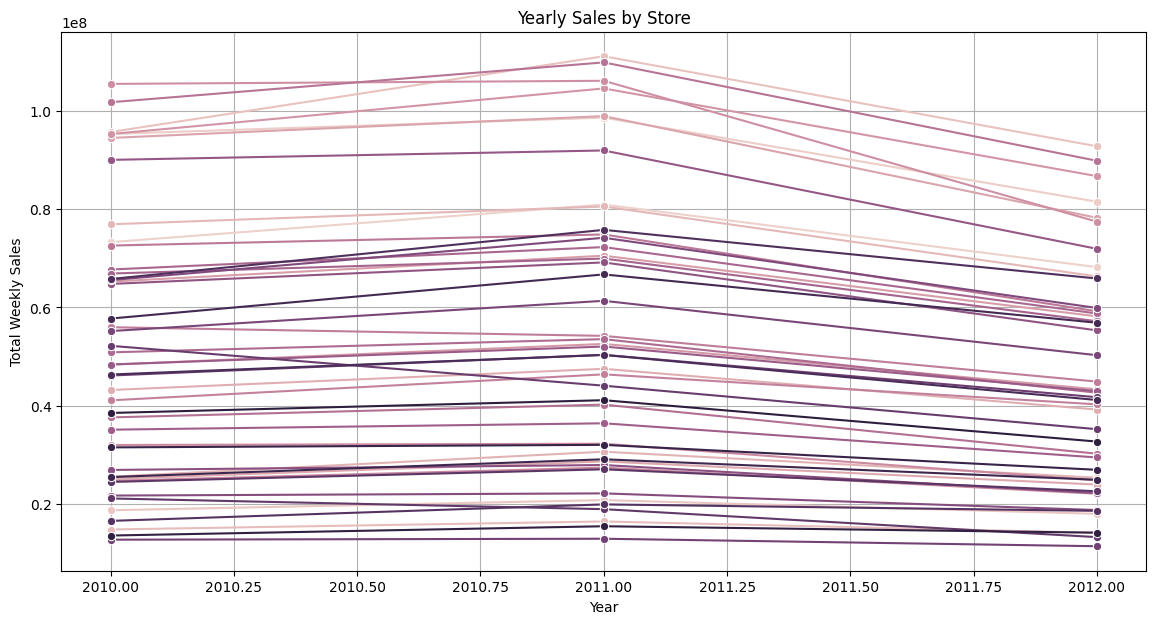

In [ ]:
# Plot: Yearly Sales by Store
plt.figure(figsize=(14, 7))
sns.lineplot(data=store_year_sales, x='Year', y='Weekly_Sales', hue='Store', marker='o', legend=None)
plt.title('Yearly Sales by Store')
plt.xlabel('Year')
plt.ylabel('Total Weekly Sales')
plt.grid(True)
plt.show()

## **Holiday Impact Analysis**

In [ ]:
# Analyze the impact of holidays on weekly sales
holiday_sales = df_encoded.groupby(['Holiday_Flag'])['Weekly_Sales'].mean().reset_index()


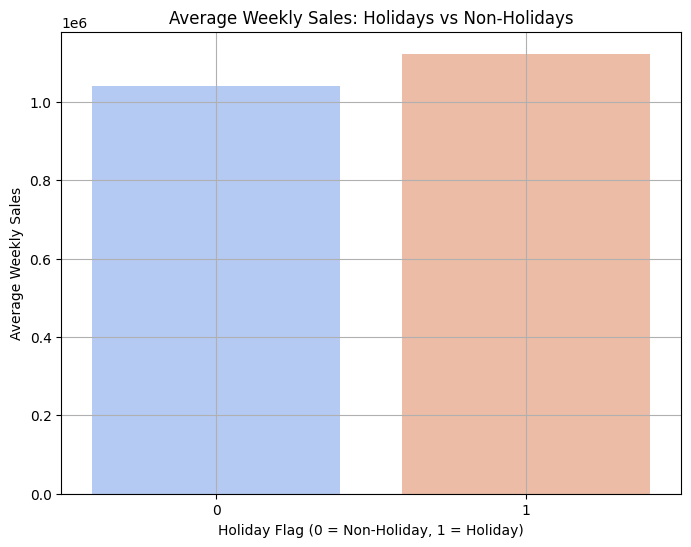

In [ ]:
# Plot: Average Weekly Sales During Holidays vs Non-Holidays
plt.figure(figsize=(8, 6))
sns.barplot(data=holiday_sales, x='Holiday_Flag', y='Weekly_Sales', palette='coolwarm')
plt.title('Average Weekly Sales: Holidays vs Non-Holidays')
plt.xlabel('Holiday Flag (0 = Non-Holiday, 1 = Holiday)')
plt.ylabel('Average Weekly Sales')
plt.grid(True)
plt.show()

## **External Factors Analysis**

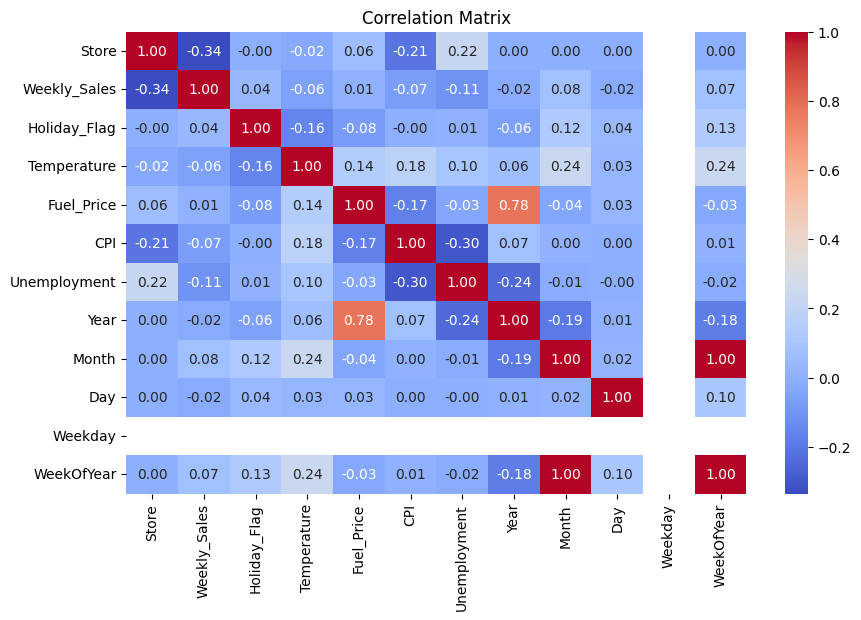

In [ ]:
# Correlation matrix to analyze the relationship between variables
plt.figure(figsize=(10, 6))
corr = df_encoded.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

## **Analysis and Insights:**


### 1. Seasonal Sales Patterns and High-Impact Months
- **Insight:**  
  Analysis shows that the months of November and December consistently have the highest total weekly sales across the years. For example, December 2011 recorded the highest sales at 288.7 million, significantly higher than the average monthly sales of around 204 million. This pattern suggests that the holiday season drives a substantial increase in sales.

- **Recommendation:**  
  Walmart should prioritize increasing inventory, enhancing promotions, and optimizing staffing during November and December to capitalize on the peak shopping period. Specific promotions tailored to holiday shopping trends can further boost sales.

### 2. Store Performance Variability
- **Insight:**  
  There is a significant disparity in sales performance among different stores. For instance, Store 20 consistently underperforms, with annual sales around 11.4 million in 2010, which is less than half of the average store sales. On the other hand, Store 14 exhibits exceptional performance, with sales peaking at 111 million in 2012.

- **Recommendation:**  
  Conduct a detailed analysis of Store 14 to identify successful strategies, such as local marketing efforts or demographic advantages, and replicate these strategies in underperforming stores like Store 20. Conversely, explore potential issues at Store 20, such as location disadvantages or poor customer service, and address them directly.

### 3. Impact of Holidays on Sales
- **Insight:**  
  Holiday weeks lead to a 7.8% increase in average weekly sales compared to non-holiday weeks. Specifically, the sales during holiday weeks average 1.12 million, whereas non-holiday weeks average $1.04 million.

- **Recommendation:**  
  Focus on aggressive marketing campaigns, special deals, and events during holiday weeks to maximize this natural uplift in sales. Additionally, ensure that inventory levels are sufficiently high to meet the increased demand during these periods, especially for high-demand items like electronics and holiday gifts.

### 4. Effect of External Factors (Temperature, CPI, Unemployment)
- **Insight:**  
  The correlation analysis reveals a weak positive correlation between temperature and weekly sales (correlation coefficient of ~0.06), indicating that warmer weather might slightly boost sales. However, CPI and unemployment have negligible correlations with weekly sales, suggesting that economic conditions reflected by these variables are not significant drivers of sales in this dataset.

- **Recommendation:**  
  While temperature does have a slight impact, it’s not strong enough to warrant major changes in strategy. Instead, focus on other known drivers of sales, such as promotions and product availability. Economic conditions should continue to be monitored, but they don’t appear to be critical in short-term sales strategy.

### 5. Year-on-Year Growth Analysis
- **Insight:**  
  The overall growth in sales from 2010 to 2012 is modest, with total sales increasing by approximately 14.5%. The largest year-over-year growth was seen from 2011 to 2012, particularly in stores like Store 10, which saw a growth of 29% in sales.

- **Recommendation:**  
  Stores that experienced significant growth should be studied to identify the factors driving this success. It could be due to changes in store management, the introduction of new product lines, or successful marketing campaigns. These strategies should be standardized and implemented across all stores to replicate the success.

## **Conclusion**
This detailed analysis provides specific and actionable insights into the sales patterns, store performances, and the impact of holidays and other factors on Walmart’s weekly sales. By implementing the targeted recommendations, Walmart can significantly improve its sales performance and gain a competitive advantage in the market.
